# <font color=purple>**Factors that Influence Expenditure and Its Regression Model.** </font>

### <font color=green> **Step 1: Import packages and classes** </font>

In [67]:
import pandas as pd
import numpy as np
import warnings
## Building Model
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from scipy import stats
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
## Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (7, 7)
plt.style.use('ggplot')
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression


### <font color=green> **Step 2: Provide Data** </font>

In [2]:
data = pd.read_excel("Survey pengeluaran dalam Sebulan.xlsx")
data

,Timestamp,Berapa Usia,Apa status Anda saat ini?,Darimana penghasilan Anda paling dominan?,Berapa penghasilan/pendapatan Anda dalam sebulan?,Berapa pengeluaran Anda dalam sebulan,Apa pengeluaran yang paling dominan?,Domisili Anda saat ini
0,2022-04-02 10:52:50.741,20,Mahasiswa,Uang Saku,1500000,800000,"Makan (Makanan wajib biar ga tewas, ex: nasi, ...",Kalimantan
1,2022-04-02 11:24:23.097,20,Mahasiswa,Uang Saku,3500000,3500000,"Makan (Makanan wajib biar ga tewas, ex: nasi, ...",Jabodetabek
2,2022-04-02 11:25:05.816,20,Mahasiswa,Uang Saku,4000000,1000000,Belanja Fashion,Sumatera
3,2022-04-02 11:26:59.896,20,Mahasiswa,Partime,2500000,500000,"Jajan (ex: boba, kue-kue lucu, hangout)",Jabodetabek
4,2022-04-02 11:29:27.378,20,Mahasiswa,Freelance,5000000,800000,"Makan (Makanan wajib biar ga tewas, ex: nasi, ...",Jabodetabek
5,2022-04-02 11:30:16.471,18,Mahasiswa,Uang Saku,500000,300000,"Makan (Makanan wajib biar ga tewas, ex: nasi, ...",Jabodetabek
6,2022-04-02 11:31:18.889,19,Mahasiswa,Uang Saku,3000000,2000000,"Jajan (ex: boba, kue-kue lucu, hangout)",Jabodetabek
7,2022-04-02 11:32:19.836,20,Bekerja,Bekerja,5000000,1500000,"Makan (Makanan wajib biar ga tewas, ex: nasi, ...",Sulawesi
8,2022-04-02 11:32:45.798,19,Mahasiswa,Uang Saku,2000000,2000000,"Makan (Makanan wajib biar ga tewas, ex: nasi, ...",Pulau Jawa
9,2022-04-02 11:33:46.272,19,Mahasiswa,Uang Saku,3500000,1500000,"Makan (Makanan wajib biar ga tewas, ex: nasi, ...",Jabodetabek


In [3]:
pd.DataFrame(data['Apa status Anda saat ini?'].unique())

,0
0,Mahasiswa
1,Bekerja
2,Mahasiswa Bekerja
3,SMA


In [4]:
#Menghapus kolom tipestamp 
data.drop(['Timestamp'], axis=1, inplace=True)

In [5]:
data['Apa status Anda saat ini?']=data['Apa status Anda saat ini?'].replace('SMA','1').replace('Mahasiswa','2').replace('Mahasiswa Bekerja', '3').replace('Bekerja','4').astype(int)

Mengganti Status dengan angka :
1 =  SMA
2 = Mahasiswa
3 =  Mahasiswa Bekerja
4 = Bekerja

In [6]:
pd.DataFrame(data)

,Berapa Usia,Apa status Anda saat ini?,Darimana penghasilan Anda paling dominan?,Berapa penghasilan/pendapatan Anda dalam sebulan?,Berapa pengeluaran Anda dalam sebulan,Apa pengeluaran yang paling dominan?,Domisili Anda saat ini
0,20,2,Uang Saku,1500000,800000,"Makan (Makanan wajib biar ga tewas, ex: nasi, ...",Kalimantan
1,20,2,Uang Saku,3500000,3500000,"Makan (Makanan wajib biar ga tewas, ex: nasi, ...",Jabodetabek
2,20,2,Uang Saku,4000000,1000000,Belanja Fashion,Sumatera
3,20,2,Partime,2500000,500000,"Jajan (ex: boba, kue-kue lucu, hangout)",Jabodetabek
4,20,2,Freelance,5000000,800000,"Makan (Makanan wajib biar ga tewas, ex: nasi, ...",Jabodetabek
5,18,2,Uang Saku,500000,300000,"Makan (Makanan wajib biar ga tewas, ex: nasi, ...",Jabodetabek
6,19,2,Uang Saku,3000000,2000000,"Jajan (ex: boba, kue-kue lucu, hangout)",Jabodetabek
7,20,4,Bekerja,5000000,1500000,"Makan (Makanan wajib biar ga tewas, ex: nasi, ...",Sulawesi
8,19,2,Uang Saku,2000000,2000000,"Makan (Makanan wajib biar ga tewas, ex: nasi, ...",Pulau Jawa
9,19,2,Uang Saku,3500000,1500000,"Makan (Makanan wajib biar ga tewas, ex: nasi, ...",Jabodetabek


In [7]:
pd.DataFrame(data['Apa status Anda saat ini?'].describe())

,Apa status Anda saat ini?
count,58.000000
mean,2.241379
std,0.683396
min,1.000000
25%,2.000000
50%,2.000000
75%,2.000000
max,4.000000


In [8]:
data.columns=['Usia','Status','Sumber Penghasilan','Pendapatan','Pengeluaran','Jenis Pengeluaran Dominan', 'Domisili'] #rename the column names to the better ones
data

,Usia,Status,Sumber Penghasilan,Pendapatan,Pengeluaran,Jenis Pengeluaran Dominan,Domisili
0,20,2,Uang Saku,1500000,800000,"Makan (Makanan wajib biar ga tewas, ex: nasi, ...",Kalimantan
1,20,2,Uang Saku,3500000,3500000,"Makan (Makanan wajib biar ga tewas, ex: nasi, ...",Jabodetabek
2,20,2,Uang Saku,4000000,1000000,Belanja Fashion,Sumatera
3,20,2,Partime,2500000,500000,"Jajan (ex: boba, kue-kue lucu, hangout)",Jabodetabek
4,20,2,Freelance,5000000,800000,"Makan (Makanan wajib biar ga tewas, ex: nasi, ...",Jabodetabek
5,18,2,Uang Saku,500000,300000,"Makan (Makanan wajib biar ga tewas, ex: nasi, ...",Jabodetabek
6,19,2,Uang Saku,3000000,2000000,"Jajan (ex: boba, kue-kue lucu, hangout)",Jabodetabek
7,20,4,Bekerja,5000000,1500000,"Makan (Makanan wajib biar ga tewas, ex: nasi, ...",Sulawesi
8,19,2,Uang Saku,2000000,2000000,"Makan (Makanan wajib biar ga tewas, ex: nasi, ...",Pulau Jawa
9,19,2,Uang Saku,3500000,1500000,"Makan (Makanan wajib biar ga tewas, ex: nasi, ...",Jabodetabek


Data diatas merupakan data dari 57 Responden yang terdiri dari berbagai jenis kalangan. Dari survei ini didapat data pengeluaran dan pemasukan setiap bulannya ,usia, status , jenis pengeluaran dominan, dan juga asal atau domisili saat ini. Untuk Analisis simple dan juga multiple linear regression data yang akan digunakan adalah Pengeluaran dalam sebulan menjadi dependen dan variabel independent yang akan kami gunakan ada 3, yakni Usia, Pendapatan, Jenjang pendidikan. 

In [9]:
dfq = data['Sumber Penghasilan'].value_counts()
dfq

Uang Saku                          38
Bekerja                            12
Freelance                           3
Partime                             2
Kerja dan masih dapat uang saku     1
bisnis                              1
Instrumen Keuangan                  1
Name: Sumber Penghasilan, dtype: int64

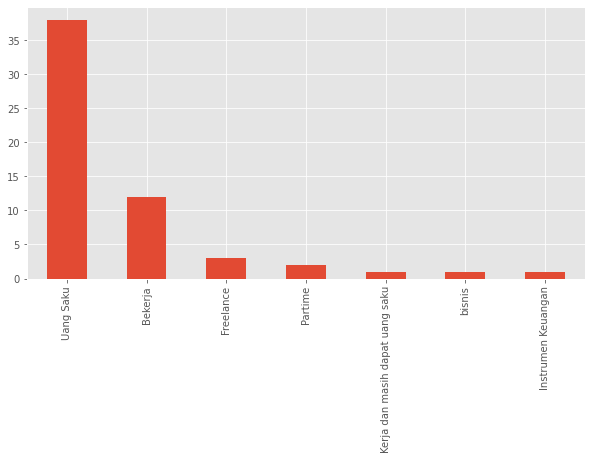

In [10]:
my_color = ['r','g']*5
my_color = [(0.5,0.4,0.5),(0.5,0.4,0.5)]*5
my_color = [(x/20.0, x/20.0, 0.75) for x in range(len(data))]
plt.figure(figsize=(10,5))
dfq.plot(kind='bar')
plt.show()

In [11]:
dfz = data['Jenis Pengeluaran Dominan'].value_counts()
dfz

Makan (Makanan wajib biar ga tewas, ex: nasi, ketoprak, dkk)    35
Jajan (ex: boba, kue-kue lucu, hangout)                         13
Pulsa/ kuota/Wifi                                                3
Belanja Fashion                                                  2
Bayar cicilan                                                    1
Buat game :D                                                     1
Ingame stuff, subscription, etc                                  1
Gonta-ganti barang elektronik                                    1
khilaf skin                                                      1
Name: Jenis Pengeluaran Dominan, dtype: int64

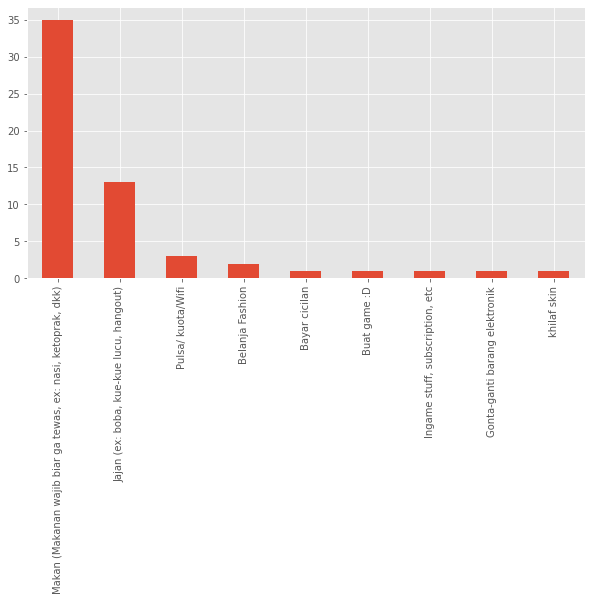

In [12]:
my_color = ['r','g']*10
my_color = [(0.5,0.4),(0.5,0.4)]*5
my_color = [(x/20.0, x/20.0, 0.75) for x in range(len(data))]
plt.figure(figsize=(10,5))
dfz.plot(kind='bar')
plt.show()

Mayoritas responden menggunakan penghasilannya untuk makan (di sini makan wajib seperti nasi, dan lain-lain). Hal ini dapat dimengerti tentunya karena manusia membutuhkan makanan untuk tetap berenergi. Namun karena responden kami sebagian besar adalah mahasiswa, menurut kami hasil ini cukup unik. Hasil ini berarti sebagian besar responden sering membeli makanan di luar terlepas makanan rumahan atau masak sendiri

### <font color=green> **Step 3: Data Summary** </font>


In [13]:
data.describe()
#Memunculkan  summary dari data

,Usia,Status,Pendapatan,Pengeluaran
count,58.000000,58.000000,5.800000e+01,5.800000e+01
mean,20.344828,2.241379,2.940517e+06,1.463448e+06
std,1.969520,0.683396,3.116178e+06,1.312363e+06
min,18.000000,1.000000,0.000000e+00,3.000000e+04
25%,19.000000,2.000000,1.500000e+06,5.250000e+05
50%,20.000000,2.000000,2.000000e+06,1.150000e+06
75%,20.750000,2.000000,3.500000e+06,2.000000e+06
max,27.000000,4.000000,1.800000e+07,8.250000e+06


Dari hasil data ini dapat kita lihat summary dari data , berupa count,mean,std,min,25%,50%,75% dan max. Dimana data data tersebut merupakan ringkasan statistik dari data diata.

In [14]:
data.shape
#Menunjukkan bentuk dari data 
#Yaitu jumlah baris dan jumlah kolom

(58, 7)

In [15]:
data.info()
#Memberikan informasi dari data set yakni berupa (banyak data perkolom,jumlah dari data yang kosong,dan tipe data dalam setiap kolom)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Usia                       58 non-null     int64 
 1   Status                     58 non-null     int32 
 2   Sumber Penghasilan         58 non-null     object
 3   Pendapatan                 58 non-null     int64 
 4   Pengeluaran                58 non-null     int64 
 5   Jenis Pengeluaran Dominan  58 non-null     object
 6   Domisili                   58 non-null     object
dtypes: int32(1), int64(3), object(3)
memory usage: 2.3+ KB


In [16]:
data.isnull().sum()*100/data.shape[0]
#Melakukan pengecekan apakah terdapat null valeu pada data

Usia                         0.0
Status                       0.0
Sumber Penghasilan           0.0
Pendapatan                   0.0
Pengeluaran                  0.0
Jenis Pengeluaran Dominan    0.0
Domisili                     0.0
dtype: float64

<AxesSubplot:>

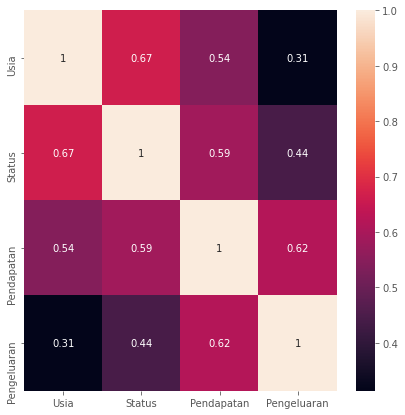

In [17]:
sns.heatmap(data.corr(),annot=True)

Berdasarkan Correlation heatmap ini, dapat kita lihat bahwa semua faktor positively correlated. Dapat dilihat pula bahwa usia memiliki nilai korelasi paling kecil, yaitu di 0.31 dilanjutkan dengan status pada 0.44, dan paling tinggi yaitu adalah pendapatan di 0.62

In [18]:
X = data[['Usia','Pendapatan','Status']]
y = data['Pengeluaran']

# Initialize model from sklearn and fit it into our data
regr = linear_model.LinearRegression()
model = regr.fit(X, y)

print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

Intercept: 1609490.883140271
Coefficients: [-8.16966832e+04  2.41322610e-01  3.59800337e+05]



1. Nilai intersep adalah perkiraan nilai rata-rata variabel dependen kami ketika semua nilai variabel independen kami adalah 0. Dalam kasus kami, ini berarti bahwa dalam kasus ketika usia 0, dan juga pendapatan Rp.0 serta status masih pelajar atau SMA, pengeluaran yang dihabisakan oleh seseorang dalam sebulan adalah sekitar Rp.1.609.490

2. Untuk koefisien, kami memiliki 3 nilai untuk variabel yakni usia, pendapatan dan juga status. Nilai ini merepresentasikan hubungan variabel independen kita dengan variabel dependen, di mana perubahan tepat 1 pada variabel independen akan mengubah nilai variabel dependen kita sebesar koefisien. Misalnya, jika Usia meningkatkan sebesar 10, maka variabel lain juga akan meningkat sebesar 10.

In [19]:
X = data[['Usia','Pendapatan','Status']]
X = sm.add_constant(X)

model = sm.OLS(data['Pengeluaran'], X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Pengeluaran   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.364
Method:                 Least Squares   F-statistic:                     11.89
Date:                Thu, 07 Apr 2022   Prob (F-statistic):           4.35e-06
Time:                        12:31:19   Log-Likelihood:                -884.15
No. Observations:                  58   AIC:                             1776.
Df Residuals:                      54   BIC:                             1785.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.609e+06   1.68e+06      0.955      0.3

### <font color=blue> **1. Uji  Asumsi Klasik** </font>

In [20]:
data['Pengeluaran_pred'] = model.predict(X)
data['residual'] = model.resid
databaru=data.drop(columns=['Jenis Pengeluaran Dominan','Sumber Penghasilan','Domisili'])
databaru.head(5)

,Usia,Status,Pendapatan,Pengeluaran,Pengeluaran_pred,residual
0,20,2,1500000,800000,1.057142e+06,-2.571418e+05
1,20,2,3500000,3500000,1.539787e+06,1.960213e+06
2,20,2,4000000,1000000,1.660448e+06,-6.604483e+05
3,20,2,2500000,500000,1.298464e+06,-7.984644e+05
4,20,2,5000000,800000,1.901771e+06,-1.101771e+06


#### 1. Linearitas 

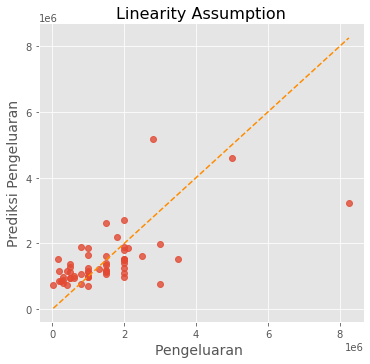

In [21]:
# Plotting the observed vs predicted values
sns.lmplot(x='Pengeluaran', y='Pengeluaran_pred', data=databaru, fit_reg=False, size=5)
    
# Plotting the diagonal line
line_coords = np.arange(databaru[['Pengeluaran', 'Pengeluaran_pred']].min().min()-10, 
                        databaru[['Pengeluaran', 'Pengeluaran_pred']].max().max()+10)
plt.plot(line_coords, line_coords,  # X and y points
         color='darkorange', linestyle='--')

plt.ylabel('Prediksi Pengeluaran', fontsize=14)
plt.xlabel('Pengeluaran ', fontsize=14)
plt.title('Linearity Assumption', fontsize=16)
plt.show()

_Plot tersebut menunjukkan titik sisa yang tersebar ternyara tidak merata di sekitar garis diagonal, sehingga dapat diasumsikan bahwa tidak terlalu ada hubungan linier antara variabel independen dan dependen kita._

#### 2. Normalitas

p-value from the test Anderson-Darling test below 0.05 generally means non-normal: 5.082714583744273e-05


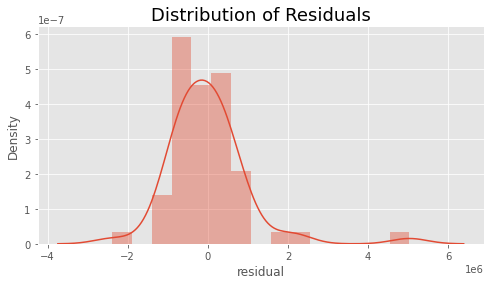

Residuals are not normally distributed


In [22]:
from statsmodels.stats.diagnostic import normal_ad

# Performing the test on the residuals
p_value = normal_ad(databaru['residual'])[1]
print('p-value from the test Anderson-Darling test below 0.05 generally means non-normal:', p_value)

# Plotting the residuals distribution
plt.subplots(figsize=(8, 4))
plt.title('Distribution of Residuals', fontsize=18)
sns.distplot(databaru['residual'])
plt.show()

# Reporting the normality of the residuals
if p_value < 0.05:
    print('Residuals are not normally distributed')
else:
    print('Residuals are normally distributed')

In [75]:
ADtest=sm.stats.diagnostic.normal_ad(databaru["residual"], axis=0)
print("Anderson Darling Statistic=",ADtest[0])
print("Anderson Darling P value=",ADtest[1])

Anderson Darling Statistic= 1.9446591577045496
Anderson Darling P value= 5.082714583744273e-05


#### 3. Multikolinearitas

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Independent variables
Xindp = data[['Usia', 'Pendapatan', 'Status']]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["Independent Variables"] = Xindp.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(Xindp.values, i)
                          for i in range(len(Xindp.columns))]
  
print(vif_data)

  Independent Variables        VIF
0                  Usia  18.831311
1            Pendapatan   2.756263
2                Status  23.180674


_Uji multikolinearitas adalah uji yang membandingkan setiap elemen varibel independent untuk melihat apakah ada korelasi antara satu variabel independent dengan varibel independent lainnya.Jika nilai VIF kurang dari 5,  maka dikatakan tidak terdapat korelasi antar variabel. Dapat kita lihat bahwa 2 dari 3 independent memiliki korelasi, namun yang terbesar adalah usia/ status. Bisa dikatakan model dari independent variabel ini tidak cukup baik._</font>

#### 4. Autokorelasi

~Jika skor Durbin-Watson kurang dari 1,5 maka terdapat autokorelasi positif dan asumsi tidak terpenuhi.

~Jika skor Durbin-Watson antara 1,5 dan 2,5 maka tidak ada autokorelasi dan asumsi puas.

~Jika skor Durbin-Watson lebih dari 2.5 maka terdapat autokorelasi negatif dan asumsi tidak puas.

In [24]:
from statsmodels.stats.stattools import durbin_watson

durbinWatson = durbin_watson(databaru['residual'])

print('Durbin-Watson:', durbinWatson)
if durbinWatson < 1.5:
    print('Signs of positive autocorrelation', '\n')
    print('Assumption not satisfied')
elif durbinWatson > 2.5:
    print('Signs of negative autocorrelation', '\n')
    print('Assumption not satisfied')
else:
    print('Little to no autocorrelation', '\n')
    print('Assumption satisfied')

Durbin-Watson: 2.448841105214408
Little to no autocorrelation 

Assumption satisfied


_Berdasarkan hasil uji Durbin-Watson dengan OLS, hasilnya adalah 2,449. Maka dikatakan model regresi ini masih wajar lebih mendekati ke arah negativly autocorrelated_

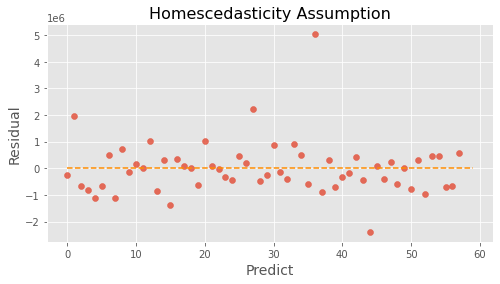

In [81]:
# Plotting the residuals
plt.subplots(figsize=(8, 4))
plt.scatter(x=databaru.index, y=databaru.residual, alpha=0.8)
plt.plot(np.repeat(0, len(databaru.index)+2), color='darkorange', linestyle='--')

plt.ylabel('Residual', fontsize=14)
plt.xlabel('Predict', fontsize=14)
plt.title('Homescedasticity Assumption', fontsize=16)
plt.show()  

In [80]:
BPtest=sm.stats.diagnostic.het_breuschpagan(databaru["residual"],x)
#LM = Lagrange Multiplier
print("Breusch Pagan LM statistic=",BPtest[0])
print("Breusch Pagan LM P Value",BPtest[1])

Breusch Pagan LM statistic= 7.603930165598199
Breusch Pagan LM P Value 0.022326854601841382


karna p value (0.0223)< significance (0.05) sehingga data residual bersifat heterokedastis

Berdasarkan 4 Uji Asumsi kalsik persamaan regressi yang kami peroleh itu, belum memiliki ketepatan dalam estimasi, memiliki bias, dan tidak konsisten.

### <font color=blue> **2. Simple Linear Regression** </font>

#### Hubungan Y dengan X1 (Pengeluaran dengan Usia)

In [25]:
data1=data.drop(columns=['Status','Pendapatan','Jenis Pengeluaran Dominan','Sumber Penghasilan','Domisili'])

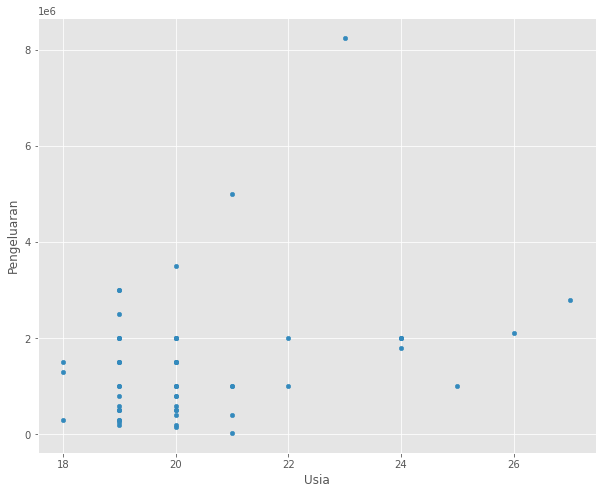

In [26]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 8))
data1.plot(x='Usia',y='Pengeluaran', ax=ax, kind='scatter')
plt.xlabel("Usia")
plt.ylabel("Pengeluaran")
plt.show()

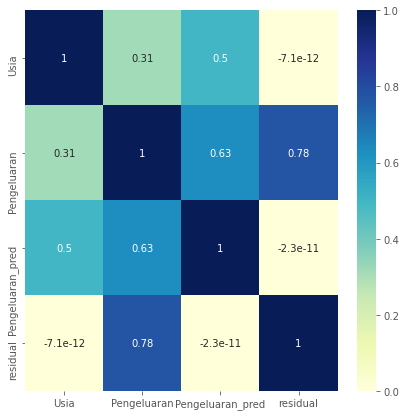

In [27]:
sns.heatmap(data1.corr(), cmap="YlGnBu", annot = True)
plt.show()

Dari visualisasi ini dapat kita lihat juga bahwa usia dan pengeluaran memiliki korelasi yang positif yakni sebesar 0.31

In [28]:
X=sm.add_constant(data1["Usia"].to_numpy())
y=data1["Pengeluaran"].to_numpy()
LR=sm.OLS(y,X)
model=LR.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     6.096
Date:                Thu, 07 Apr 2022   Prob (F-statistic):             0.0166
Time:                        12:31:22   Log-Likelihood:                -895.86
No. Observations:                  58   AIC:                             1796.
Df Residuals:                      56   BIC:                             1800.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.784e+06   1.73e+06     -1.611      0.1

Dari sini dapat kita lihat ringkasan analisis terkait dengan simple linear regression, dan tentunya kita dapat melihat beberapa  informasi tambahan yang dapat menambah hasil analisis kita terkait dengan data kita.

#### Hubungan Y dengan X2 (Pengeluaran dengan Pendapatan)

In [29]:
data2=data.drop(columns=['Status','Usia','Jenis Pengeluaran Dominan','Sumber Penghasilan','Domisili'])

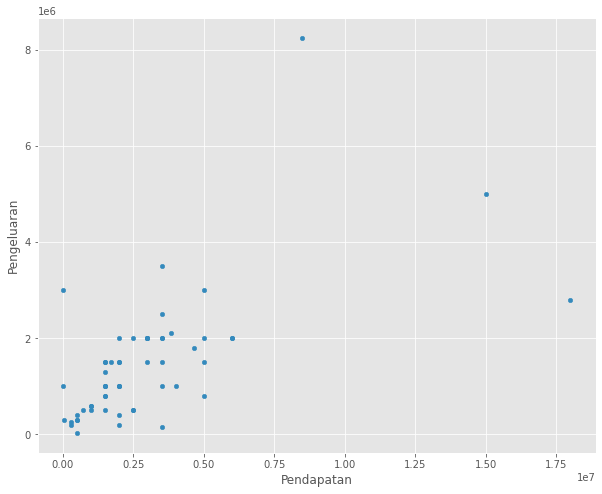

In [30]:
fig, ax = plt.subplots(figsize=(10, 8))
data2.plot(x='Pendapatan',y='Pengeluaran', ax=ax, kind='scatter')
plt.xlabel("Pendapatan")
plt.ylabel("Pengeluaran")
plt.show()

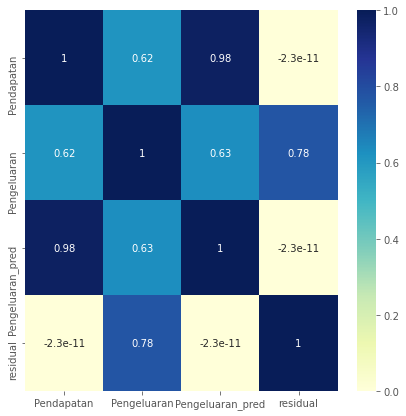

In [31]:
sns.heatmap(data2.corr(), cmap="YlGnBu", annot = True)
plt.show()

Dari visualisasi ini dapat kita lihat juga bahwa pendapatan dan pengeluaran memiliki korelasi yang positif yakni sebesar 0.62

In [32]:
X=sm.add_constant(data2["Pendapatan"].to_numpy())
y=data2["Pengeluaran"].to_numpy()
LR=sm.OLS(y,X)
model=LR.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.369
Method:                 Least Squares   F-statistic:                     34.35
Date:                Thu, 07 Apr 2022   Prob (F-statistic):           2.56e-07
Time:                        12:31:23   Log-Likelihood:                -884.99
No. Observations:                  58   AIC:                             1774.
Df Residuals:                      56   BIC:                             1778.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.999e+05   1.89e+05      3.704      0.0

Dari sini dapat kita lihat ringkasan analisis terkait dengan simple linear regression, dan tentunya kita dapat melihat beberapa  informasi tambahan yang dapat menambah hasil analisis kita terkait dengan data kita.

#### Hubungan Y dengan X3 (Pengeluaran dengan Status)

In [33]:
data3=data.drop(columns=['Pendapatan','Usia','Jenis Pengeluaran Dominan','Sumber Penghasilan','Domisili'])

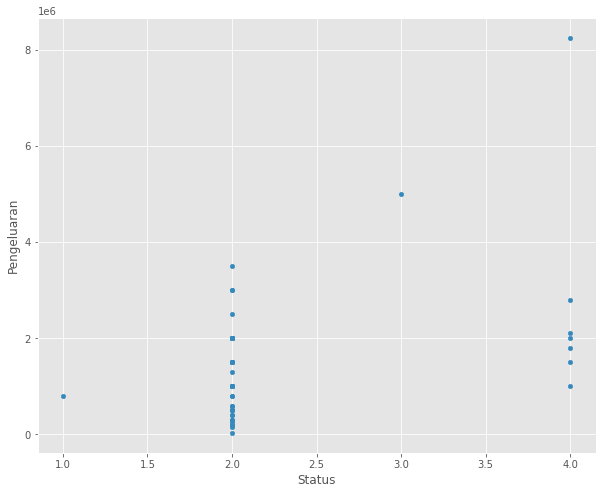

In [34]:
fig, ax = plt.subplots(figsize=(10, 8))
data.plot(x='Status',y='Pengeluaran', ax=ax, kind='scatter')
plt.xlabel("Status")
plt.ylabel("Pengeluaran")
plt.show()

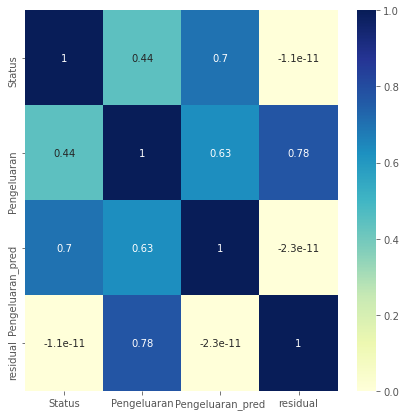

In [35]:
sns.heatmap(data3.corr(), cmap="YlGnBu", annot = True)
plt.show()

Dari visualisasi ini dapat kita lihat juga bahwa status dan pengeluaran memiliki korelasi yang positif yakni sebesar 0.44

In [36]:
X=sm.add_constant(data3["Status"].to_numpy())
y=data3["Pengeluaran"].to_numpy()
LR=sm.OLS(y,X)
model=LR.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.196
Model:                            OLS   Adj. R-squared:                  0.181
Method:                 Least Squares   F-statistic:                     13.62
Date:                Thu, 07 Apr 2022   Prob (F-statistic):           0.000508
Time:                        12:31:24   Log-Likelihood:                -892.55
No. Observations:                  58   AIC:                             1789.
Df Residuals:                      56   BIC:                             1793.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.404e+05   5.39e+05     -0.817      0.4

Dari sini dapat kita lihat ringkasan analisis terkait dengan simple linear regression, dan tentunya kita dapat melihat beberapa  informasi tambahan yang dapat menambah hasil analisis kita terkait dengan data kita.

###### Conclusion

Dapat kami simpulkan dalam analisis berikut bahwa faktor-faktor seperti usia, status, dan pendapatan terbukti berpengaruh terhadap tingkat pengeluaran seseorang.

### <font color=blue> **3. Multiple Linear Regression** </font>

#### Analisis Multiple Linear Regression antara Y(Pengeluaran) dengan (X1,X2,X3)(Usia, Pendapatan, Status

### <font color=brown> **Hubungan Y (Pengeluaran) dengan X1,X2(Usia, Pendapatan)** </font>

In [37]:
LR = LinearRegression()
x1_ = data[['Usia','Pendapatan']]
y1_ = data[['Pengeluaran']] 
model_ = LR.fit(x1_,y1_) 

In [38]:
b0_=model_.intercept_[0] #find the intercept
b1_=model_.coef_[0][0] #find the 1st slope
b2_=model_.coef_[0][1] #find the 2nd slope
print('The Intercept (b_0):', b0_.round(4), '(rounded to 4 decimal places)') 
print('The Slope (b_1):', b1_.round(4),'(rounded to 4 decimal places)') 
print('The Slope (b_2):', b2_.round(4),'(rounded to 4 decimal places)')

The Intercept (b_0): 1088477.7432 (rounded to 4 decimal places)
The Slope (b_1): -20096.8558 (rounded to 4 decimal places)
The Slope (b_2): 0.2666 (rounded to 4 decimal places)


 ###### The coefficient of determination

In [39]:
r_sq1_ = model_.score(x1_,y1_) #find the coefficient of determination
print('The Coefficient of Determination (R^2):', r_sq1_.round(4), '(rounded to 4 decimal places)')  

The Coefficient of Determination (R^2): 0.3808 (rounded to 4 decimal places)


Berdasarkan hasil ini, R-squared atau coefficient of determination berada di 0.3808 

###### The coefficient of correlation

In [40]:
r1_ = (r_sq1_)**(1/2) #find the coefficient of correlation
print('The Coefficient of Correlation (R):', r1_.round(4), '(rounded to 4 decimal places)')  

The Coefficient of Correlation (R): 0.6171 (rounded to 4 decimal places)


Berdasarkan hasil ini, R atau coefficient of correlation berada di 0.6171

In [41]:
df1 = data.copy().drop(['Status','Jenis Pengeluaran Dominan','Sumber Penghasilan','Domisili'], axis=1) #remove the mother pre-pregnancy weight column
y_pred_ = model_.predict(x1_) #calculate the estimated birth weight (y_pred) for each gestation (x1) and maternal age (x2) data using the regression model
df1['Est. Pengeluaran'] = y_pred_
df1['Residual'] = df1['Pengeluaran'] - df1['Est. Pengeluaran'] #Menghitung nilai residual dengan mengurangi nilai pengeluaran dengan nilai estimasi pengeluaran 
df1['Residual Sq.'] = df1['Residual']**2
dfd = pd.DataFrame(df1)
dfd

,Usia,Pendapatan,Pengeluaran,Pengeluaran_pred,residual,Est. Pengeluaran,Residual,Residual Sq.
0,20,1500000,800000,1.057142e+06,-2.571418e+05,1.086387e+06,-2.863874e+05,8.201776e+10
1,20,3500000,3500000,1.539787e+06,1.960213e+06,1.619516e+06,1.880484e+06,3.536218e+12
2,20,4000000,1000000,1.660448e+06,-6.604483e+05,1.752799e+06,-7.527988e+05,5.667060e+11
3,20,2500000,500000,1.298464e+06,-7.984644e+05,1.352952e+06,-8.529520e+05,7.275270e+11
4,20,5000000,800000,1.901771e+06,-1.101771e+06,2.019363e+06,-1.219363e+06,1.486847e+12
5,18,500000,300000,9.792126e+05,-6.792126e+05,8.600166e+05,-5.600166e+05,3.136186e+11
6,19,3000000,2000000,1.500822e+06,4.991776e+05,1.506331e+06,4.936689e+05,2.437090e+11
7,20,5000000,1500000,2.621372e+06,-1.121372e+06,2.019363e+06,-5.193633e+05,2.697382e+11
8,19,2000000,2000000,1.259500e+06,7.405002e+05,1.239767e+06,7.602335e+05,5.779549e+11
9,19,3500000,1500000,1.621484e+06,-1.214837e+05,1.639613e+06,-1.396133e+05,1.949188e+10


Data berikut merupakan hasil Residual-squared yang didapat dari mengkuadratkan nilai Residual yang didapat dari mengurangi nilai Pengeluaran dan nilai Estimasi Pengeluaran

###### The sum squares of residual

In [42]:
RSS_ = df1['Residual Sq.'].sum() #calculate the sum squares of residual
print('Sum Squares of Residual (RSS):', RSS_.round(4), '(rounded to 4 decimal places)')

Sum Squares of Residual (RSS): 60785576135325.27 (rounded to 4 decimal places)


Berdasarkan hasil ini, RSS atau Sum Squares of Residual berada di 60785576135325.26

Using the statsmodels.api package, we can have the overall summary of Ordinary Least Square  (OLS) Analysis for the regression model.

In [43]:
x = sm.add_constant(data[['Usia','Pendapatan']]).to_numpy()
y = data['Pengeluaran'].to_numpy()
LR = sm.OLS(y,x)
model = LR.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.381
Model:                            OLS   Adj. R-squared:                  0.358
Method:                 Least Squares   F-statistic:                     16.91
Date:                Thu, 07 Apr 2022   Prob (F-statistic):           1.88e-06
Time:                        12:31:24   Log-Likelihood:                -884.96
No. Observations:                  58   AIC:                             1776.
Df Residuals:                      55   BIC:                             1782.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.088e+06   1.64e+06      0.664      0.5

### <font color=brown> **Hubungan Y (Pengeluaran) dengan X1,X3(Usia, Status)** </font>

In [44]:
LR = LinearRegression()
x2_ = data[['Usia','Status']]
y2_ = data[['Pengeluaran']] 
model_ = LR.fit(x2_,y2_) 

In [45]:
b0_=model_.intercept_[0] #find the intercept
b1_=model_.coef_[0][0] #find the 1st slope
b2_=model_.coef_[0][1] #find the 2nd slope
print('The Intercept (b_0):', b0_.round(4), '(rounded to 4 decimal places)') 
print('The Slope (b_1):', b1_.round(4),'(rounded to 4 decimal places)') 
print('The Slope (b_2):', b2_.round(4),'(rounded to 4 decimal places)')

The Intercept (b_0): -792505.488 (rounded to 4 decimal places)
The Slope (b_1): 21957.5312 (rounded to 4 decimal places)
The Slope (b_2): 807195.6265 (rounded to 4 decimal places)


 ###### The coefficient of determination

In [46]:
r_sq2_ = model_.score(x2_,y2_) #find the coefficient of determination
print('The Coefficient of Determination (R^2):', r_sq2_.round(4), '(rounded to 4 decimal places)')  

The Coefficient of Determination (R^2): 0.1962 (rounded to 4 decimal places)


Berikut merupakan nilai R-squared atau coefficient of Determination dari hubungan antara pengeluaran dengan usia dan status yang berada di 0.1962

###### The coefficient of correlation

In [47]:
r2_ = (r_sq2_)**(1/2) #find the coefficient of correlation
print('The Coefficient of Correlation (R):', r2_.round(4), '(rounded to 4 decimal places)')  

The Coefficient of Correlation (R): 0.443 (rounded to 4 decimal places)


Berikut merupakan nilai R atau coefficient of Correlation dari hubungan antara pengeluaran dengan usia dan status yang berada di 0.443

In [48]:
df2 = data.copy().drop(['Pendapatan','Jenis Pengeluaran Dominan','Sumber Penghasilan','Domisili'], axis=1) #remove the mother pre-pregnancy weight column
y_pred_ = model_.predict(x2_) #calculate the estimated birth weight (y_pred) for each gestation (x1) and maternal age (x2) data using the regression model
df2['Est. Pengeluaran'] = y_pred_
df2['Residual'] = df2['Pengeluaran'] - df2['Est. Pengeluaran'] #calculate the residual data by subtracting birth weight data to estimated birth weight 
df2['Residual Sq.'] = df2['Residual']**2
dfh = pd.DataFrame(df2)
dfh

,Usia,Status,Pengeluaran,Pengeluaran_pred,residual,Est. Pengeluaran,Residual,Residual Sq.
0,20,2,800000,1.057142e+06,-2.571418e+05,1.261036e+06,-4.610364e+05,2.125546e+11
1,20,2,3500000,1.539787e+06,1.960213e+06,1.261036e+06,2.238964e+06,5.012958e+12
2,20,2,1000000,1.660448e+06,-6.604483e+05,1.261036e+06,-2.610364e+05,6.814000e+10
3,20,2,500000,1.298464e+06,-7.984644e+05,1.261036e+06,-7.610364e+05,5.791764e+11
4,20,2,800000,1.901771e+06,-1.101771e+06,1.261036e+06,-4.610364e+05,2.125546e+11
5,18,2,300000,9.792126e+05,-6.792126e+05,1.217121e+06,-9.171213e+05,8.411115e+11
6,19,2,2000000,1.500822e+06,4.991776e+05,1.239079e+06,7.609211e+05,5.790010e+11
7,20,4,1500000,2.621372e+06,-1.121372e+06,2.875428e+06,-1.375428e+06,1.891801e+12
8,19,2,2000000,1.259500e+06,7.405002e+05,1.239079e+06,7.609211e+05,5.790010e+11
9,19,2,1500000,1.621484e+06,-1.214837e+05,1.239079e+06,2.609211e+05,6.807984e+10


###### The sum squares of residual

In [49]:
RSS2_ = df2['Residual Sq.'].sum() #calculate the sum squares of residual
print('Sum Squares of Residual (RSS):', RSS2_.round(4), '(rounded to 4 decimal places)')

Sum Squares of Residual (RSS): 78905243156872.69 (rounded to 4 decimal places)


Berikut merupakan nilai RSS atau Sum Squares of Residual dari hubungan antara pengeluaran dengan usia dan status yang berada di 78905243156872.67 

In [50]:
x1 = sm.add_constant(data[['Usia','Status']]).to_numpy()
y1 = data['Pengeluaran'].to_numpy()
LR1 = sm.OLS(y1,x1)
model = LR1.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.196
Model:                            OLS   Adj. R-squared:                  0.167
Method:                 Least Squares   F-statistic:                     6.714
Date:                Thu, 07 Apr 2022   Prob (F-statistic):            0.00246
Time:                        12:31:24   Log-Likelihood:                -892.52
No. Observations:                  58   AIC:                             1791.
Df Residuals:                      55   BIC:                             1797.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7.925e+05   1.82e+06     -0.436      0.6

### <font color=brown> **Hubungan Y (Pengeluaran) dengan X2,X3(Pendapatan, Status)** </font>

In [51]:
LR = LinearRegression()
x3_ = data[['Pendapatan','Status']]
y3_ = data[['Pengeluaran']] 
model_ = LR.fit(x3_,y3_) 

In [52]:
b0_=model_.intercept_[0] #find the intercept
b1_=model_.coef_[0][0] #find the 1st slope
b2_=model_.coef_[0][1] #find the 2nd slope
print('The Intercept (b_0):', b0_.round(4), '(rounded to 4 decimal places)') 
print('The Slope (b_1):', b1_.round(4),'(rounded to 4 decimal places)') 
print('The Slope (b_2):', b2_.round(4),'(rounded to 4 decimal places)')

The Intercept (b_0): 262945.4522 (rounded to 4 decimal places)
The Slope (b_1): 0.2294 (rounded to 4 decimal places)
The Slope (b_2): 234605.3919 (rounded to 4 decimal places)


 ###### The coefficient of determination

In [53]:
r_sq3_ = model_.score(x3_,y3_) #find the coefficient of determination
print('The Coefficient of Determination (R^2):', r_sq3_.round(4), '(rounded to 4 decimal places)')  

The Coefficient of Determination (R^2): 0.3899 (rounded to 4 decimal places)


Berikut merupakan nilai R-squared atau Coefficient of Determination dari hubungan antara pengeluaran dengan pendapatan dan status yang berada di 0.3899

###### The coefficient of correlation

In [54]:
r3_ = (r_sq3_)**(1/2) #find the coefficient of correlation
print('The Coefficient of Correlation (R):', r3_.round(4), '(rounded to 4 decimal places)')  

The Coefficient of Correlation (R): 0.6245 (rounded to 4 decimal places)


Berikut merupakan nilai R atau Coefficient of Correlation dari hubungan antara pengeluaran dengan pendapatan dan status yang berada di 0.6245

In [55]:
df3 = data.copy().drop(['Usia','Jenis Pengeluaran Dominan','Sumber Penghasilan','Domisili'], axis=1) #remove the mother pre-pregnancy weight column
y_pred_ = model_.predict(x3_) #calculate the estimated birth weight (y_pred) for each gestation (x1) and maternal age (x2) data using the regression model
df3['Est. Pengeluaran'] = y_pred_
df3['Residual'] = df3['Pengeluaran'] - df3['Est. Pengeluaran'] #calculate the residual data by subtracting birth weight data to estimated birth weight 
df3['Residual Sq.'] = df3['Residual']**2
dfg = pd.DataFrame(df3)
dfg

,Status,Pendapatan,Pengeluaran,Pengeluaran_pred,residual,Est. Pengeluaran,Residual,Residual Sq.
0,2,1500000,800000,1.057142e+06,-2.571418e+05,1.076312e+06,-2.763116e+05,7.634809e+10
1,2,3500000,3500000,1.539787e+06,1.960213e+06,1.535185e+06,1.964815e+06,3.860497e+12
2,2,4000000,1000000,1.660448e+06,-6.604483e+05,1.649904e+06,-6.499038e+05,4.223750e+11
3,2,2500000,500000,1.298464e+06,-7.984644e+05,1.305748e+06,-8.057485e+05,6.492306e+11
4,2,5000000,800000,1.901771e+06,-1.101771e+06,1.879341e+06,-1.079341e+06,1.164976e+12
5,2,500000,300000,9.792126e+05,-6.792126e+05,8.468747e+05,-5.468747e+05,2.990719e+11
6,2,3000000,2000000,1.500822e+06,4.991776e+05,1.420467e+06,5.795331e+05,3.358586e+11
7,4,5000000,1500000,2.621372e+06,-1.121372e+06,2.348552e+06,-8.485515e+05,7.200397e+11
8,2,2000000,2000000,1.259500e+06,7.405002e+05,1.191030e+06,8.089700e+05,6.544324e+11
9,2,3500000,1500000,1.621484e+06,-1.214837e+05,1.535185e+06,-3.518538e+04,1.238011e+09


###### The sum squares of residual

In [56]:
RSS3_ = df3['Residual Sq.'].sum() #calculate the sum squares of residual
print('Sum Squares of Residual (RSS):', RSS3_.round(4), '(rounded to 4 decimal places)')

Sum Squares of Residual (RSS): 59889365875090.24 (rounded to 4 decimal places)


Berikut merupakan nilai RSS atau Sum Squares of Residual dari hubungan antara pengeluaran dengan pendapatan dan status yang berada di 59889365875090.24

In [57]:
x3 = sm.add_constant(data[['Pendapatan','Status']]).to_numpy()
y3 = data['Pengeluaran'].to_numpy()
LR2 = sm.OLS(y3,x3)
model = LR2.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.390
Model:                            OLS   Adj. R-squared:                  0.368
Method:                 Least Squares   F-statistic:                     17.58
Date:                Thu, 07 Apr 2022   Prob (F-statistic):           1.25e-06
Time:                        12:31:25   Log-Likelihood:                -884.53
No. Observations:                  58   AIC:                             1775.
Df Residuals:                      55   BIC:                             1781.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.629e+05   5.03e+05      0.523      0.6

### <font color=brown> **Hubungan Y (Pengeluaran) dengan X1,X2,X3(Usia,Pendapatan, Status)** </font>

In [58]:
LR = LinearRegression()
x4_ = data[['Usia','Pendapatan','Status']]
y4_ = data[['Pengeluaran']] 
model_ = LR.fit(x4_,y4_) 

In [59]:
b0_=model_.intercept_[0] #find the intercept
b1_=model_.coef_[0][0] #find the 1st slope
b2_=model_.coef_[0][1] #find the 2nd slope
print('The Intercept (b_0):', b0_.round(4), '(rounded to 4 decimal places)') 
print('The Slope (b_1):', b1_.round(4),'(rounded to 4 decimal places)') 
print('The Slope (b_2):', b2_.round(4),'(rounded to 4 decimal places)')

The Intercept (b_0): 1609490.8831 (rounded to 4 decimal places)
The Slope (b_1): -81696.6832 (rounded to 4 decimal places)
The Slope (b_2): 0.2413 (rounded to 4 decimal places)


 ###### The coefficient of determination

In [60]:
r_sq4_ = model_.score(x4_,y4_) #find the coefficient of determination
print('The Coefficient of Determination (R^2):', r_sq4_.round(4), '(rounded to 4 decimal places)')  

The Coefficient of Determination (R^2): 0.3978 (rounded to 4 decimal places)


Berikut merupakan nilai R-squared atau Coefficient of Determination dari hubungan antara pengeluaran dengan usia, pendapatan, dan status yang berada di 0.3978

###### The coefficient of correlation

In [61]:
r4_ = (r_sq4_)**(1/2) #find the coefficient of correlation
print('The Coefficient of Correlation (R):', r4_.round(4), '(rounded to 4 decimal places)')  

The Coefficient of Correlation (R): 0.6307 (rounded to 4 decimal places)


Berikut merupakan nilai R atau Coefficient of Correlation dari hubungan antara pengeluaran dengan usia, pendapatan, dan status yang berada di 0.6307

In [62]:
df4 = data.copy().drop(['Jenis Pengeluaran Dominan','Sumber Penghasilan','Domisili'], axis=1) #remove the mother pre-pregnancy weight column
y_pred_ = model_.predict(x4_) #calculate the estimated birth weight (y_pred) for each gestation (x1) and maternal age (x2) data using the regression model
df4['Est. Pengeluaran'] = y_pred_
df4['Residual'] = df4['Pengeluaran'] - df4['Est. Pengeluaran'] #calculate the residual data by subtracting birth weight data to estimated birth weight 
df4['Residual Sq.'] = df4['Residual']**2
dfr = pd.DataFrame(df4)
dfr

,Usia,Status,Pendapatan,Pengeluaran,Pengeluaran_pred,residual,Est. Pengeluaran,Residual,Residual Sq.
0,20,2,1500000,800000,1.057142e+06,-2.571418e+05,1.057142e+06,-2.571418e+05,6.612191e+10
1,20,2,3500000,3500000,1.539787e+06,1.960213e+06,1.539787e+06,1.960213e+06,3.842435e+12
2,20,2,4000000,1000000,1.660448e+06,-6.604483e+05,1.660448e+06,-6.604483e+05,4.361920e+11
3,20,2,2500000,500000,1.298464e+06,-7.984644e+05,1.298464e+06,-7.984644e+05,6.375454e+11
4,20,2,5000000,800000,1.901771e+06,-1.101771e+06,1.901771e+06,-1.101771e+06,1.213899e+12
5,18,2,500000,300000,9.792126e+05,-6.792126e+05,9.792126e+05,-6.792126e+05,4.613297e+11
6,19,2,3000000,2000000,1.500822e+06,4.991776e+05,1.500822e+06,4.991776e+05,2.491783e+11
7,20,4,5000000,1500000,2.621372e+06,-1.121372e+06,2.621372e+06,-1.121372e+06,1.257474e+12
8,19,2,2000000,2000000,1.259500e+06,7.405002e+05,1.259500e+06,7.405002e+05,5.483406e+11
9,19,2,3500000,1500000,1.621484e+06,-1.214837e+05,1.621484e+06,-1.214837e+05,1.475829e+10


###### The sum squares of residual

In [63]:
RSS4_ = df4['Residual Sq.'].sum() #calculate the sum squares of residual
print('Sum Squares of Residual (RSS):', RSS4_.round(4), '(rounded to 4 decimal places)')

Sum Squares of Residual (RSS): 59121375292577.47 (rounded to 4 decimal places)


Berikut merupakan nilai RSS atau Sum Squares of Residual dari hubungan antara pengeluaran dengan usia, pendapatan, dan status yang berada di 59121375292577.47

In [64]:
x4 = sm.add_constant(data[['Usia','Pendapatan','Status']]).to_numpy()
y4 = data['Pengeluaran'].to_numpy()
LR3 = sm.OLS(y4,x4)
model = LR3.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.364
Method:                 Least Squares   F-statistic:                     11.89
Date:                Thu, 07 Apr 2022   Prob (F-statistic):           4.35e-06
Time:                        12:31:25   Log-Likelihood:                -884.15
No. Observations:                  58   AIC:                             1776.
Df Residuals:                      54   BIC:                             1785.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.609e+06   1.68e+06      0.955      0.3

Berikut merupakan summary dari regression menggunakan Ordinary Least Square method. Berdasarkan summary ini, dapat kita lihat bahwa R-squared adalah 0.398 dan adjusted R-squared adalah 0.364. Adjusted R-squared artinya R-squared akan disesuaikan menurut jumlah variabel yang ada. Karena adjusted R-squared lebih kecil, penambahan variabel tidak akan meningkatkan keakuratan estimasi. Kita lihat pula bahwa nilai Kurtosis berada pada 12.061 yang artinya positive dan outliernya cukup ekstrem karena adanya nilai tail yang panjang.

# Kesimpulan

Ketiga variabel independent berdasarkan analisis regresi belum cukup baik untuk merepresentasikan pengeluaran karena nilai setiap R^2(R-squared) dari setiap variabel independent masih rendah, yakni <0,5. 

Berdasarkan 4 Uji Asumsi kalsik persamaan regressi yang kami peroleh itu, belum memiliki ketepatan dalam estimasi, memiliki bias, dan tidak konsisten.

Variabel dependent dan independent memiliki korelasi yang positif, artinya semua faktor independent (usia, status, pendapatan) merupakan hal-hal yang dapat mempengaruhi pengeluaran.

Dari ketiga variabel independent, yang memiliki korelasi paling rendah adalah usia, disusul dengan status, dan pendapatan menempati korelasi tertinggi.